<a href="https://colab.research.google.com/github/Jeen-Freecs/DS_Pet_Projects/blob/main/Numerical%20Algorithms/Numerical_Root_Finding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project: Numerical root finding

**Abstract**

In this assignment, we examined 3 types of Numerical Root finding methods, which were False-Position, Newton-Raphson and Secant methods. False-Position Method is the type of Bracketing methods, while the Newton-Raphson and Secant methods are the types of Open methods.





**Introduction**

It is known that Bracketing Methods, comparing to Open Methods, are relatively slow in computations, but the results in Bracketing methods are more reliable.So we would expect such patterns in our assessment of methods.

The whole focus was on assessing the efficiency of each method in finding the root of the following equation.

 $$\\v=\frac{gm}{c}(1-e^{−(c/m)t})$$

*  $g = 9.8$ m/s$^2$
*  $c = 15$ kg/s
*  $v = 35$ m/s
*  $t = 9$ s

For a further working with this eqution we should rewrite this function into the form of $f(m) = 0$ :

$$\frac{9.8m}{15}(1-e^{−(135/m)})-35 = 0$$

It is also important for us to find the derivative of this function for further calculations:

$$\frac{9.8}{15}(1-e^{−(135/m)}-\frac{135e^{−(135/m)}}{m})$$


**Main Body**


In [ ]:
#necessary libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#assigning of functions
def f(m):
  v = 35
  return ((9.8*m)/15)*(1-np.exp(-(135/m))) - v

def df(m):
  return (9.8/15)*(1-np.exp(-135/m)-(135*np.exp(-135/m))/m)

estimate_error = 1e-12
imax = 100

**Task 1**: 
Graphical approach

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


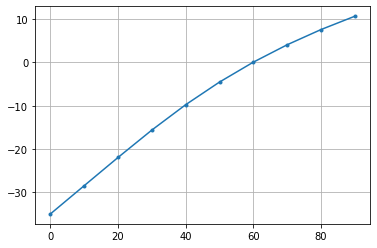

In [ ]:
m = np.arange(0, 100, 10)
plt.grid()
plt.plot(m,f(m),marker = 'o', markersize = 3)
plt.show()

Through the graphical approach we can assume that root of the function will be around 60kg.

**Task 2**: False-Position Method

In [ ]:
def falsepos(ml, mu, es, imax):
  mr = mu
  m = []
  errors = []
  iter = []
  for i in range(imax):
    mr_old = mr
    mr = mu - (f(mu)*(ml-mu))/(f(ml)-f(mu))
    if (mr != 0.0):
      ea = abs((mr - mr_old)/mr)*100
    iter.append(i)
    m.append(mr)
    errors.append(ea)
    test = f(ml)*f(mr)
    if (test < 0.0):
      mu = mr
    elif (test > 0.0):
      ml = mr
    else:
      ea = 0.0
    if (ea < es):
      break
  return iter, m, errors

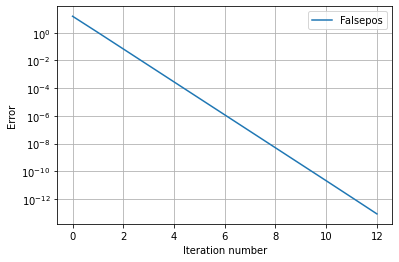

In [ ]:
i1,m1,e1 = falsepos(50,70,estimate_error,imax)

plt.plot(i1,e1, label = 'Falsepos')

plt.legend()
plt.xlabel('Iteration number')
plt.ylabel('Error')
plt.yscale('log')
plt.grid()
plt.show()

In [ ]:
print(m1)

[60.51423018797449, 59.88461306536265, 59.843859432951454, 59.84122656643693, 59.84105649267782, 59.84104550660973, 59.841044796955096, 59.841044751114346, 59.84104474815323, 59.84104474796195, 59.84104474794958, 59.84104474794879, 59.84104474794874]


**Task 3**: The Newton-Raphson Method

In [ ]:
def nr(m0,estimate_error,imax):
  mr=m0
  m=[]
  errors=[]
  iter=[]
  for i in range(imax):
    mr_old=mr
    mr = mr_old - f(mr_old)/df(mr_old)
    if(mr!=0):
      ea = abs((mr-mr_old)/mr)*100
    iter.append(i)
    m.append(mr)
    errors.append(ea)
    if(ea < es):
      break
  return iter,m,errors

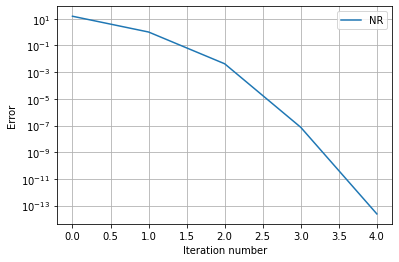

In [ ]:
i2,m2,e2 = nr(50,estimate_error,imax)

plt.plot(i2,e2, label = 'NR')

plt.legend()
plt.xlabel('Iteration number')
plt.ylabel('Error')
plt.yscale('log')
plt.grid()
plt.show()

In [ ]:
print(m2)

[59.22579374493676, 59.838493375300544, 59.841044703931196, 59.841044747948736, 59.84104474794875]


**Task 4**: The Secant Method

In [ ]:
def secant(m0,m1,estimate_error,imax):
  m=[]
  errors=[]
  iter=[];

  for i in range(imax):
    if f(m1) - f(m0) == 0:
      return m1
    mr=m1 - (f(m1)*(m1-m0)*1.0)/(f(m1)-f(m0))
    m0=m1
    m1=mr
    if (mr!=0):
      ea = abs((mr-m0)/mr)*100
    iter.append(i)
    m.append(mr)
    errors.append(ea)
    if(ea < es):
      break
  return iter,m,errors

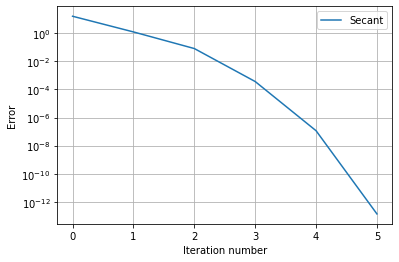

In [ ]:
i3,m3,e3 = secant(50,70,estimate_error,imax)

plt.plot(i3,e3, label = 'Secant')

plt.legend()
plt.xlabel('Iteration number')
plt.ylabel('Error')
plt.yscale('log')
plt.grid()
plt.show()

In [ ]:
print(m3)

[60.51423018797449, 59.79363233296128, 59.841260927771586, 59.84104481724939, 59.841044747948644, 59.84104474794873]


**Task 5**: Plot of the Total Error as a function of Iterations (all 3 methods)

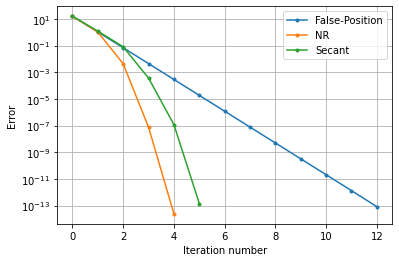

In [ ]:
plt.plot(i1,e1, label = 'False-Position',marker = 'o', markersize = 3)
plt.plot(i2,e2, label = 'NR',marker = 'o', markersize = 3)
plt.plot(i3,e3, label = 'Secant',marker = 'o', markersize = 3)

plt.legend()
plt.xlabel('Iteration number')
plt.ylabel('Error')
plt.yscale('log')
plt.grid()
plt.show()

Analyzing this plot, we can say that False-Position method has **linear convergence**, while both Newton - Raphson and Secant methods has **quadratic convergence**.

**Task 6**: Max. Precision

In [ ]:
print(e1)
print(e2)
print(e3)


[15.675271390811712, 1.0513838035901275, 0.06809994007297593, 0.004399753590614093, 0.0002842091518366597, 1.8358750248753456e-05, 1.1858994740282517e-06, 7.660419374920341e-08, 4.9483023056645836e-09, 3.19643658081577e-10, 2.0672348020807596e-11, 1.3179957669785604e-12, 8.31168501698192e-14]
[15.577323935359628, 1.0239222209707046, 0.004263509508022322, 7.355743874575943e-08, 2.3747671477091195e-14]
[15.675271390811712, 1.2051414622221908, 0.07959156286461475, 0.0003611409574412028, 1.1580804908504773e-07, 1.4248602886254722e-13]


Here are the list of all 3 methods and their final error values.


*   The False - Position Method: 8.31168501698192e-14
*   The Newton-Raphson Method: 2.3747671477091195e-14
*   The Secant Method: 1.4248602886254722e-13

From these calculated results, it can be said that beside of being the type of Open Methods, the  Newton-Raphson method has the greatest precision.





```
# Выбран кодовый формат
```

**Task 7**: Time Efficiency

From the plot above, by looking at number of iterations were made, it can be stated that the Newton-Raphson Method is the fastest method for finding the root of this equation with the estimate error.

However we also can analyze each method by %timeit funciton, which will show us the best runtime of a cell.

In [ ]:
%timeit i1,m1,e1 = falsepos(50,70,estimate_error,imax)

10000 loops, best of 3: 193 µs per loop


In [ ]:
%timeit i2,m2,e2 = nr(50,estimate_error,imax)

10000 loops, best of 3: 44.1 µs per loop


In [ ]:
%timeit i3,m3,e3 = secant(50,70,estimate_error,imax)

10000 loops, best of 3: 97.1 µs per loop


By looking at the results of %timeit function, we can see that runtime of Newton-Raphson Method is approximately 4 times smaller than the runtime of False-Position Method and 2 times smaller than the runtime of Secant Method.Thus, makes the Newton-Raphson Method the fastest one.

**Conclusion**

Comparing the features of each Method,especially in the plot,the Newton-Raphson Method is the most efficient way of finding the root of this equation, as it has the greatest precision and the smallest runtime.As we mentionded before in introduction, the Open methods' runtime is faster than the runtime of Bracketing Methods and we proved this in our assignment. However what we did not expect is the highest precision in the Newton-Raphson Method, as we have the False-Position method.We tend to think that the reason for Newton-Raphson method having the most reliable results is the accuracy of the initial guess.

Furthermore, the False-Position and Secant methods are almost identical in performing their calculation, however the main distinction is the way how the Secant method replace intial values by the new estimate.
Because of this distinction the Secant has the higher chance of getting a divergence, while False-Position method almost always converges.
